In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.kernel_ridge
from sklearn.model_selection import GridSearchCV


In [3]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
path_to_train = '/content/drive/My Drive/AMATH 582/HW 3/wine_training.csv'
path_to_test = '/content/drive/My Drive/AMATH 582/HW 3/wine_test.csv'
path_to_new_batch = '/content/drive/My Drive/AMATH 582/HW 3/wine_new_batch.csv'

#### Training data
train_data = pd.read_csv(path_to_train,header=None)
d_train = np.array(train_data)
print(d_train.shape)
X_train = d_train[:,0:11]
Y_train = d_train[:,11]
print(X_train.shape)
print(Y_train.shape)
print(d_train)
print(X_train)
print(Y_train)

### Test data
test_data = pd.read_csv(path_to_test,header=None)
d_test = np.array(test_data)
X_test = d_test[:,0:11]
Y_test = d_test[:,11]
print(X_test.shape)
print(Y_test.shape)
### New batch
new_batch_data = pd.read_csv(path_to_new_batch,header=None)
X_new_batch = np.array(new_batch_data)
print(X_new_batch.shape)

(1115, 12)
(1115, 11)
(1115,)
[[ 6.1   0.6   0.08 ...  0.54 11.    5.  ]
 [10.3   0.53  0.48 ...  0.59  9.3   6.  ]
 [ 6.9   0.49  0.19 ...  0.64  9.8   6.  ]
 ...
 [ 7.    0.38  0.49 ...  0.77 11.4   6.  ]
 [10.    0.35  0.47 ...  0.52 12.    6.  ]
 [ 7.    0.6   0.3  ...  1.17 10.2   5.  ]]
[[ 6.1   0.6   0.08 ...  3.38  0.54 11.  ]
 [10.3   0.53  0.48 ...  3.12  0.59  9.3 ]
 [ 6.9   0.49  0.19 ...  3.38  0.64  9.8 ]
 ...
 [ 7.    0.38  0.49 ...  3.39  0.77 11.4 ]
 [10.    0.35  0.47 ...  3.23  0.52 12.  ]
 [ 7.    0.6   0.3  ...  3.3   1.17 10.2 ]]
[5. 6. 6. ... 6. 6. 5.]
(479, 11)
(479,)
(5, 11)


Centering Data set

After predicting the quality of the wine, will round up to nearest integer using the round function for consistency with the training data however will give the result from both ways. 

Normalizing and Centering the training set

In [91]:
X_train_N = X_train.shape[0]
print(X_train_N)
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train_normal = (X_train - np.matlib.repmat(X_train_mean, X_train_N, 1))/np.matlib.repmat(X_train_std, X_train_N, 1)
print(X_train_mean)
Y_train_N = Y_train.shape[0]

Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)

Y_train_normal = (Y_train - Y_train_mean)/Y_train_std

1115
[ 8.35183857  0.52507623  0.27384753  2.55399103  0.08926547 16.15695067
 46.38699552  0.99683448  3.31076233  0.66102242 10.39699552]


Centering and normalizing Test set based on training mean and standard deviation

In [92]:
X_test_N = X_test.shape[0]
X_test_normal = (X_test - np.matlib.repmat(X_train_mean, X_test_N, 1))/np.matlib.repmat(X_train_std, X_test_N, 1)
Y_test_normal = (Y_test - Y_train_mean)/Y_train_std

Centering and normalizing the new batch

In [93]:
X_new_batch_N = X_new_batch.shape[0]
X_new_batch_normal = (X_new_batch - np.matlib.repmat(X_train_mean, X_new_batch_N, 1))/np.matlib.repmat(X_train_std, X_new_batch_N, 1)

## Data set Manipulation

Linear Regression for Training Set


In [94]:
lin_fit = LinearRegression().fit(X_train_normal,Y_train_normal)
Y_predict_train_lin = lin_fit.predict(X_train_normal)
lin_fit_train_mse = mean_squared_error(Y_train_normal,Y_predict_train_lin)
print('linear fit MSE train:',lin_fit_train_mse)

linear fit MSE train: 0.6278484956554882


Linear Regression for Test Set

In [95]:
Y_predict_test_lin = lin_fit.predict(X_test_normal)
lin_fit_test_mse = mean_squared_error(Y_test_normal,Y_predict_test_lin)
print('linear fit MSE test:',lin_fit_test_mse)

linear fit MSE test: 0.7471696905187208


Linear Regression for New batch

In [96]:
Y_predict_new_batch_lin = lin_fit.predict(X_new_batch_normal)
Y_predict_new_batch_lin_renorm = Y_predict_new_batch_lin*Y_train_std + Y_train_mean
print(np.around(Y_predict_new_batch_lin_renorm,decimals=2))

[6.   5.29 5.56 6.07 5.94]


Kernel Regression Gaussian CV Training set

In [97]:
# range of sigma and lambda to try 

K_sgm = 10
K_lmbd = 10
sgm = np.linspace(-5,5,K_sgm)
lmbd = np.linspace(-5,5,K_lmbd)

# CV and do fit
KRR = skl.kernel_ridge.KernelRidge(kernel='rbf')
param_krr_gaus = {'alpha':2**lmbd,'gamma': 1/(2*(2**sgm)**2)}
cv_krr_gaus = GridSearchCV(KRR,param_krr_gaus,cv=10,scoring='neg_mean_squared_error') # cv is crossvalidation param
cv_krr_gaus.fit(X_train_normal,Y_train_normal)
# Time taken is about 2 min 23 s so for first time should go with 4 data point for both

GridSearchCV(cv=10, estimator=KernelRidge(kernel='rbf'),
             param_grid={'alpha': array([3.12500000e-02, 6.75037337e-02, 1.45816130e-01, 3.14980262e-01,
       6.80395000e-01, 1.46973449e+00, 3.17480210e+00, 6.85795186e+00,
       1.48139954e+01, 3.20000000e+01]),
                         'gamma': array([5.12000000e+02, 1.09727230e+02, 2.35157519e+01, 5.03968420e+00,
       1.08005974e+00, 2.31468678e-01, 4.96062829e-02, 1.06311719e-02,
       2.27837703e-03, 4.88281250e-04])},
             scoring='neg_mean_squared_error')

In [98]:
print(cv_krr_gaus.best_params_)

{'alpha': 0.3149802624737183, 'gamma': 0.049606282874006216}


In [99]:
optimal_param_gaus_cv = cv_krr_gaus.best_params_
optimal_lmbd_gaus = np.log2(optimal_param_gaus_cv['alpha'])
optimal_sgm_gaus = np.log2(1/(np.sqrt(2*optimal_param_gaus_cv['gamma'])))
print('optimal gaus log_2_lmbd:',optimal_lmbd_gaus)
print('optimal gaus log_2_sgm:',optimal_sgm_gaus)

optimal gaus log_2_lmbd: -1.6666666666666665
optimal gaus log_2_sgm: 1.666666666666667


In [100]:
gamma_sgm = 1/(2*(2**sgm)**2)
optimal_gamma_loc = np.array(np.where(gamma_sgm ==optimal_param_gaus_cv['gamma']))
print(optimal_gamma_loc)
print(sgm[optimal_gamma_loc])

[[6]]
[[1.66666667]]


In [101]:
# MSE 

Y_predict_train = cv_krr_gaus.predict(X_train_normal)
krr_gaus_train_mse = mean_squared_error(Y_train_normal,Y_predict_train)
print(krr_gaus_train_mse)

0.4443644835200735


Kernel Ridge Gaussian for test set

In [102]:
Y_predict_test = cv_krr_gaus.predict(X_test_normal)
krr_gaus_test_mse = mean_squared_error(Y_test_normal,Y_predict_test)
print(krr_gaus_test_mse)

0.6707146529560469


Kernel Ridge Gaussian for new batch

In [103]:
Y_predict_new_batch_gaus = cv_krr_gaus.predict(X_new_batch_normal)
Y_predict_new_batch_gaus_renorm = Y_predict_new_batch_gaus*Y_train_std + Y_train_mean
print(Y_predict_new_batch_gaus_renorm)

[6.02506681 5.45131357 5.42488008 6.18782517 6.1157892 ]


Kernal Regression Laplacian CV Training Set

In [104]:
# range of sigma and lambda to try 

K_sgm = 10
K_lmbd = 10
sgm = np.linspace(-5,5,K_sgm)
lmbd = np.linspace(-5,5,K_lmbd)

# CV and do fit
KRR = skl.kernel_ridge.KernelRidge(kernel='laplacian')
param_krr_lap = {'gamma': 1/(2**sgm),'alpha':2**lmbd}
cv_krr_lap = GridSearchCV(KRR,param_krr_lap,cv=10,scoring='neg_mean_squared_error') # cv is crossvalidation param
cv_krr_lap.fit(X_train_normal,Y_train_normal)
# About 25 s in colab

GridSearchCV(cv=10, estimator=KernelRidge(kernel='laplacian'),
             param_grid={'alpha': array([3.12500000e-02, 6.75037337e-02, 1.45816130e-01, 3.14980262e-01,
       6.80395000e-01, 1.46973449e+00, 3.17480210e+00, 6.85795186e+00,
       1.48139954e+01, 3.20000000e+01]),
                         'gamma': array([3.20000000e+01, 1.48139954e+01, 6.85795186e+00, 3.17480210e+00,
       1.46973449e+00, 6.80395000e-01, 3.14980262e-01, 1.45816130e-01,
       6.75037337e-02, 3.12500000e-02])},
             scoring='neg_mean_squared_error')

In [105]:
print(cv_krr_lap.best_params_)

{'alpha': 0.1458161299470146, 'gamma': 0.31498026247371824}


In [106]:
optimal_param_lap_cv = cv_krr_lap.best_params_
optimal_lmbd_lap = np.log2(optimal_param_lap_cv['alpha'])
optimal_sgm_lap = np.log2(1/optimal_param_lap_cv['gamma'])
print('optimal laplacian log_2_lmbd:',optimal_lmbd_lap)
print('optimal laplacian log_2_sgm:',optimal_sgm_lap)

optimal laplacian log_2_lmbd: -2.7777777777777777
optimal laplacian log_2_sgm: 1.666666666666667


In [107]:
print(cv_krr_lap.cv_results_['mean_test_score']) # to get the contour plot of the hyperparameter
print(cv_krr_lap.cv_results_['rank_test_score'])

[-0.86642585 -0.86586567 -0.86458534 -0.85705303 -0.79868869 -0.60710729
 -0.55022239 -0.57175091 -0.5924661  -0.59266213 -0.86680904 -0.86625844
 -0.86499634 -0.85764264 -0.80062833 -0.60891355 -0.54833226 -0.56186641
 -0.57374009 -0.5775137  -0.86829983 -0.86776826 -0.86653711 -0.85952054
 -0.80516529 -0.6133951  -0.54686771 -0.55259579 -0.56251654 -0.57439651
 -0.87332057 -0.87282439 -0.87163772 -0.86519111 -0.8156385  -0.62438255
 -0.54928992 -0.54943967 -0.56226821 -0.58017842 -0.88644537 -0.88600893
 -0.88488543 -0.87928105 -0.83729692 -0.64863193 -0.56116171 -0.5563854
 -0.57147458 -0.59031454 -0.91045383 -0.91010559 -0.90910442 -0.9046161
 -0.8725934  -0.69259318 -0.58628992 -0.57309229 -0.58602507 -0.6028814
 -0.93990263 -0.93966019 -0.93888347 -0.93570149 -0.91425587 -0.75579373
 -0.62417266 -0.59708723 -0.60435408 -0.62050756 -0.96516859 -0.96502259
 -0.96451725 -0.96255961 -0.94995853 -0.82820372 -0.67345156 -0.62856338
 -0.62987896 -0.64905927 -0.9818189  -0.9817405  -0.98

In [108]:
print(np.reshape(cv_krr_lap.cv_results_['mean_test_score'],(10,10))) # to get the contour plot of the hyperparameter
print(np.reshape(cv_krr_lap.cv_results_['rank_test_score'],(10,10)))

[[-0.86642585 -0.86586567 -0.86458534 -0.85705303 -0.79868869 -0.60710729
  -0.55022239 -0.57175091 -0.5924661  -0.59266213]
 [-0.86680904 -0.86625844 -0.86499634 -0.85764264 -0.80062833 -0.60891355
  -0.54833226 -0.56186641 -0.57374009 -0.5775137 ]
 [-0.86829983 -0.86776826 -0.86653711 -0.85952054 -0.80516529 -0.6133951
  -0.54686771 -0.55259579 -0.56251654 -0.57439651]
 [-0.87332057 -0.87282439 -0.87163772 -0.86519111 -0.8156385  -0.62438255
  -0.54928992 -0.54943967 -0.56226821 -0.58017842]
 [-0.88644537 -0.88600893 -0.88488543 -0.87928105 -0.83729692 -0.64863193
  -0.56116171 -0.5563854  -0.57147458 -0.59031454]
 [-0.91045383 -0.91010559 -0.90910442 -0.9046161  -0.8725934  -0.69259318
  -0.58628992 -0.57309229 -0.58602507 -0.6028814 ]
 [-0.93990263 -0.93966019 -0.93888347 -0.93570149 -0.91425587 -0.75579373
  -0.62417266 -0.59708723 -0.60435408 -0.62050756]
 [-0.96516859 -0.96502259 -0.96451725 -0.96255961 -0.94995853 -0.82820372
  -0.67345156 -0.62856338 -0.62987896 -0.64905927]
 

In [109]:
# MSE 

Y_predict_train_lap = cv_krr_lap.predict(X_train_normal)
krr_lap_train_mse = mean_squared_error(Y_train_normal,Y_predict_train_lap)
print('MSE Train Laplacian:',krr_lap_train_mse)

MSE Train Laplacian: 0.020583598120412418


Kernel Ridge Laplacian for Test set

In [110]:
Y_predict_test_lap = cv_krr_lap.predict(X_test_normal)
krr_lap_test_mse = mean_squared_error(Y_test_normal,Y_predict_test_lap)
print('MSE Test Laplacian:',krr_lap_test_mse)

MSE Test Laplacian: 0.6053653947193887


Kernel Ridge Laplacian for New Batch

In [111]:
Y_predict_new_batch_lap = cv_krr_lap.predict(X_new_batch_normal)
Y_predict_new_batch_lap_renorm = Y_predict_new_batch_lap*Y_train_std + Y_train_mean
print(Y_predict_new_batch_lap_renorm)

[5.97057609 5.5419334  5.61353909 5.86953368 5.91433613]


## Plotting to have a better physical understanding of the data

Input features (columns 1-11 in CSV files):

   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol

   Output (column 12 in CSV file): 
   12 - quality (score between 0 and 10)

Effect of fixed acidity on the quality

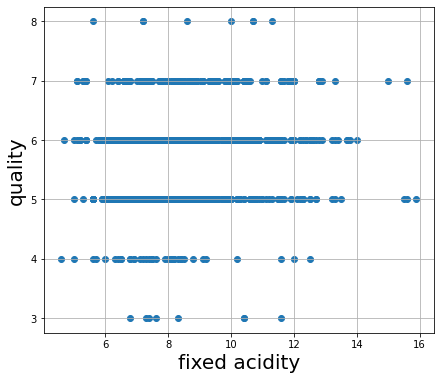

In [112]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0],Y_train)

plt.xlabel('fixed acidity',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

effect of volatile acidity

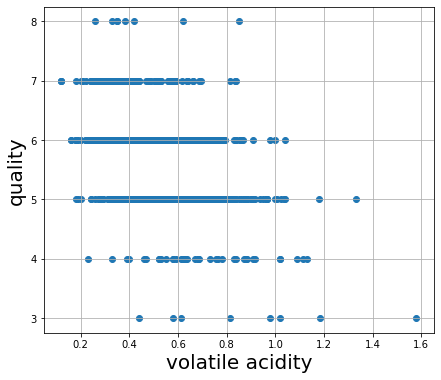

In [113]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,1],Y_train)

plt.xlabel('volatile acidity',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

effect of citric acid

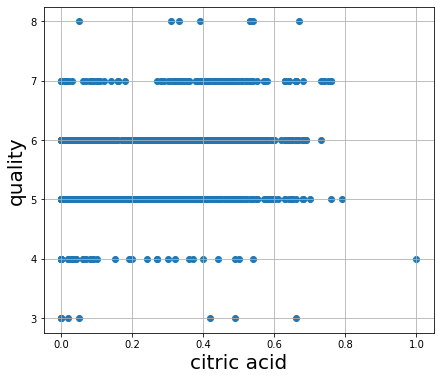

In [114]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,2],Y_train)

plt.xlabel('citric acid',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

Residual sugar effect

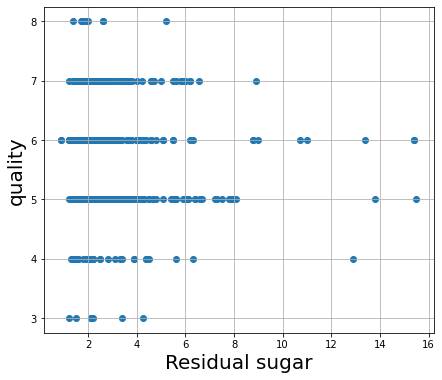

In [115]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,3],Y_train)

plt.xlabel('Residual sugar',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

chlorides effect

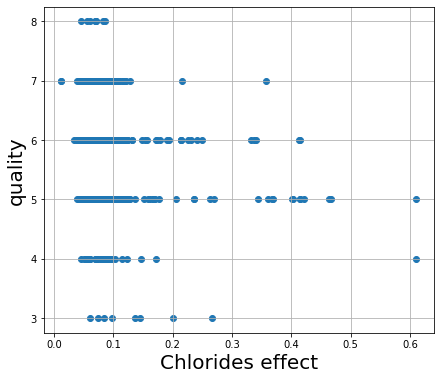

In [116]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,4],Y_train)

plt.xlabel('Chlorides effect',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

free SO2 effect

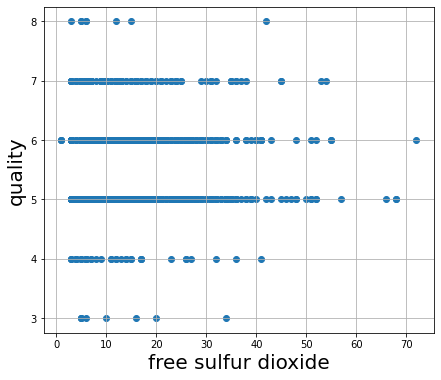

In [117]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,5],Y_train)

plt.xlabel('free sulfur dioxide',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

Total SO2 effect

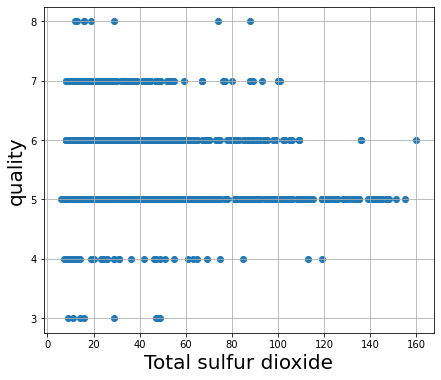

In [118]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,6],Y_train)

plt.xlabel('Total sulfur dioxide',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

Density effect

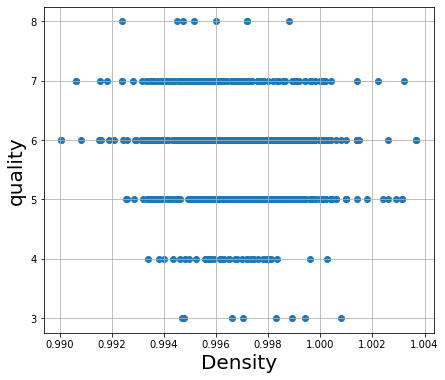

In [119]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,7],Y_train)

plt.xlabel('Density',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

pH effect

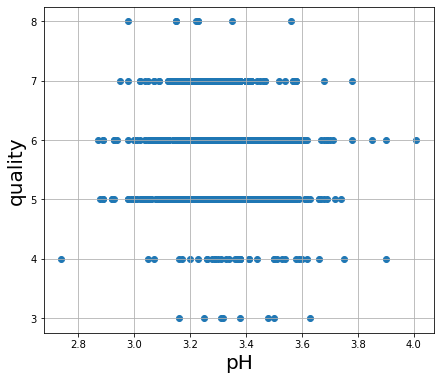

In [120]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,8],Y_train)

plt.xlabel('pH',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

Sulphates effect

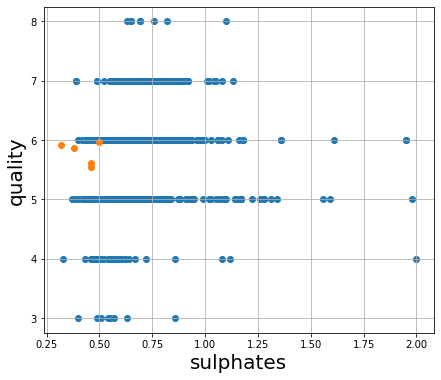

In [128]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,9],Y_train)
plt.scatter(X_new_batch[:,9],Y_predict_new_batch_lap_renorm)
plt.xlabel('sulphates',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

alcohol effect

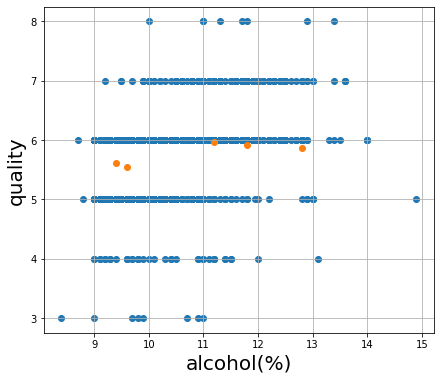

In [122]:
plt.figure(figsize=(7,6))
plt.scatter(X_train[:,10],Y_train)
plt.scatter(X_new_batch[:,10],Y_predict_new_batch_lap_renorm)
plt.xlabel('alcohol(%)',fontsize = 20)
plt.ylabel('quality',fontsize = 20)
plt.grid()

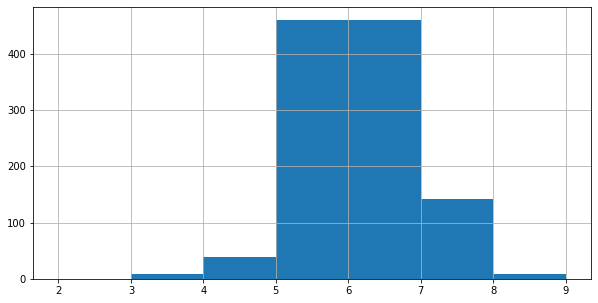

In [123]:
#fig, axis = plt.subplots(figsize =(10, 5))
plt.figure(figsize=(10,5))
plt.hist(Y_train, bins = [2,3,4,5,6,7,8,9])
# Displaying the graph
plt.grid()

In [124]:
qual3 = np.array(np.where(Y_train== 3))
qual4 = np.array(np.where(Y_train== 4))
qual5 = np.array(np.where(Y_train== 5))
qual6 = np.array(np.where(Y_train== 6))
qual7 = np.array(np.where(Y_train== 7))
qual8 = np.array(np.where(Y_train== 8))
print('quality 3:',qual3.size,'quality 4:',qual4.size)
print('quality 5:',qual5.size,'quality 6:',qual6.size)
print('quality 7:',qual7.size,'quality 8:',qual8.size)
print((qual5.size+qual6.size)/Y_train.size)

quality 3: 8 quality 4: 38
quality 5: 460 quality 6: 460
quality 7: 141 quality 8: 8
0.8251121076233184


In [135]:
qual3t = np.array(np.where(Y_test== 3))
qual4t = np.array(np.where(Y_test== 4))
qual5t = np.array(np.where(Y_test== 5))
qual6t = np.array(np.where(Y_test== 6))
qual7t = np.array(np.where(Y_test== 7))
qual8t = np.array(np.where(Y_test== 8))
print('quality 3 test:',qual3t.size,'quality 4 test:',qual4t.size)
print('quality 5 test:',qual5t.size,'quality 6 test:',qual6t.size)
print('quality 7 test:',qual7t.size,'quality 8 test:',qual8t.size)
print((qual5t.size+qual6t.size)/Y_test.size)

quality 3 test: 2 quality 4 test: 15
quality 5 test: 219 quality 6 test: 175
quality 7 test: 58 quality 8 test: 10
0.8225469728601252


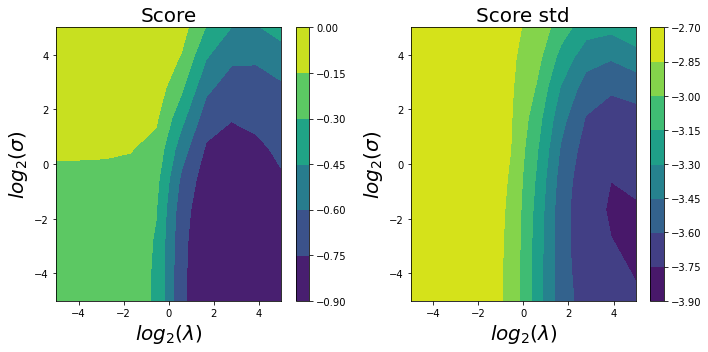

In [139]:
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(10,5))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(np.reshape(cv_krr_lap.cv_results_['mean_test_score'],(10,10)))))
ax[0].set_xlabel('$log_2(\lambda)$',fontsize = 20)
ax[0].set_ylabel('$log_2(\sigma)$',fontsize = 20)
ax[0].set_title('Score',fontsize = 20)
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(np.reshape(cv_krr_lap.cv_results_['std_test_score'],(10,10)))))
ax[1].set_xlabel('$log_2(\lambda)$',fontsize = 20)
ax[1].set_ylabel('$log_2(\sigma)$',fontsize = 20)
ax[1].set_title('Score std',fontsize = 20)
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

Gaussian Contour Plot

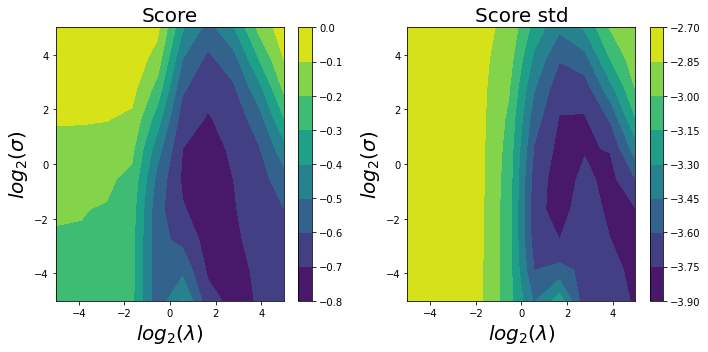

In [140]:
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(10,5))

cm0 = ax[0].contourf( lv, sv,np.log2(np.abs( np.reshape(cv_krr_gaus.cv_results_['mean_test_score'],(10,10)))))
ax[0].set_xlabel('$log_2(\lambda)$',fontsize = 20)
ax[0].set_ylabel('$log_2(\sigma)$',fontsize = 20)
ax[0].set_title('Score',fontsize = 20)
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(np.reshape(cv_krr_gaus.cv_results_['std_test_score'],(10,10)))))
ax[1].set_xlabel('$log_2(\lambda)$',fontsize = 20)
ax[1].set_ylabel('$log_2(\sigma)$',fontsize = 20)
ax[1].set_title('Score std',fontsize = 20)
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()